In [2]:
import pandas as pd
import re

# 读取数据
df = pd.read_excel("C:\\Users\\ffq73\\Desktop\\学习\\python泛数字\\大数据经济学\\大数据大作业\\joblist_1000.xlsx")
dfnew = pd.read_excel("C:\\Users\\ffq73\\Desktop\\学习\\python泛数字\\大数据经济学\\大数据大作业\\jobdata.xlsx")
#hebingshuju
df = pd.concat([df,dfnew],ignore_index=True)
df = df.drop_duplicates()
def clean_salary(salary_str):
    if pd.isna(salary_str):
        return None
    
    # 1. 处理 "10-15K" 或 "10-15k" 格式
    match_k = re.search(r'(\d+)-(\d+)[Kk]', str(salary_str))
    if match_k:
        low = float(match_k.group(1))
        high = float(match_k.group(2))
        return (low + high) / 2
        
    # 2. 处理 "元/天" (实习生数据)，建议转化成月薪或直接标记为不处理
    # 如果要简单粗暴，可以直接剔除实习生，或者按 21天/月 换算
    match_day = re.search(r'(\d+)-(\d+)元/天', str(salary_str))
    if match_day:
        low = float(match_day.group(1))
        high = float(match_day.group(2))
        return ((low + high) / 2 * 21.75) / 1000  # 换算成 k/月
        
    return None # 无法解析的格式（如面议）

df['avg_salary'] = df['薪资'].apply(clean_salary)

# 关键：剔除算不出薪资的行，否则后面报错
df = df.dropna(subset=['avg_salary'])
# 映射学历
edu_map = {
    '学历不限': 0,
    '高中': 1,
    '中专/中技': 1,
    '大专': 2,
    '本科': 3,
    '硕士': 4,
    '博士': 5
}
df['edu_level'] = df['学历'].map(edu_map).fillna(0) # 没匹配到的默认0

# 映射经验
# 注意：你的截图里有 "1年以内", "1-3年", "3-5年", "5-10年"
exp_map = {
    '经验不限': 0,
    '在校/应届': 0,
    '1年以内': 0.5,
    '1-3年': 2,
    '3-5年': 4,
    '5-10年': 7.5,
    '10年以上': 12
}
df['exp_level'] = df['经验'].map(exp_map).fillna(0)

In [3]:
!pip install seaborn jieba wordcloud -i https://pypi.tuna.tsinghua.edu.cn/simple
df

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


,职位,公司,薪资,地区,经验,学历,公司规模,行业,福利标签,技能标签,职位描述,job_id,avg_salary,edu_level,exp_level
0,实习生（25届+金融学优先）,江苏天鼎,6-8K,南京,经验不限,大专,500-999人,互联网金融,"零食下午茶,加班补助,团建聚餐,节日福利,生日福利,员工旅游,年终奖,股票期权,带薪年假,五险一金",金融/证券,任职资格：1、接受应届无经验，在校有过学生干部或兼职经历者优先；2、有意向在公司学习考取证券...,NaN,7.0,2.0,0.0
1,学科编辑（金融学、经济学方向）,智慧树,9-14K,上海,1-3年,本科,1000-9999人,互联网,"带薪年假,交通补助,节日福利,五险一金,补充医疗保险","线上教育,大学/大专生,成人/通用,留学生,学科应试,职业与技能培训,有教研经验,有教育工作...",岗位职责：1、根据平台课程资源，归纳知识点，提炼知识内容，构建高质量的课程知识图谱；2、在知...,NaN,11.5,3.0,2.0
2,诚聘金融业储备管理+ 快速晋升+高薪2w+！,小企助力,12-16K,济南,经验不限,学历不限,1000-9999人,投资/融资,"节日福利,生日福利,零食下午茶,绩效奖金,工龄奖,意外险,通讯补贴,带薪年假,全勤奖,补充医...","企业（To B）,客户邀约,客户签约,沟通能力强,销售经验,互联网金融,金融产品",以下所有内容，均可在公司求证！欢迎面试了解销售岗位平均薪资17482元。刚毕业，0经验的小伙...,NaN,14.0,0.0,0.0
3,案前外联调解员-金融业,邯郸律数,5-8K,邯郸,1-3年,大专,100-499人,其他专业服务,"夜班补助,年终奖,团建聚餐,保底工资,零食下午茶,五险一金,绩效奖金,节日福利,节假日加班费...","银行/互联网金融,催收团队建立及管理,电话催收,贷后管理体系及流程建立,电话客服经验,沟通/...",岗位职责: 处理法院派发的相关经济纠纷案件任职要求: 全日制大专及以上年龄*******内男...,NaN,6.5,2.0,2.0
4,网格员＋五险一金＋金融业＋周末双休,葫芦岛市天润科技,5-10K,葫芦岛,经验不限,大专,0-20人,广播/影视,"五险一金,绩效奖金,有无线网,保底工资,底薪加提成","客户活动组织,个人（To C）,医疗/大健康,对企业/机构（To B）销售经验,客户数据分析...",招聘社区网格员“服务顾问岗，只需负责公司老客户售后服务，约见客户，原单逾期信息更新，客户售后...,NaN,7.5,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,量化交易员,某中型量化投资证券/期货公司,25-50K,上海,经验不限,本科,100-499人,证券/期货,"高品质团建,免费三餐,年终奖,带薪年假,零食下午茶,节假日加班费,补充医疗保险,住房补贴,节...","中、低、高频,期货,股票,期权,量化交易员",NaN,c18241f723bcaedf03N83Nm-FFdU,37.5,3.0,0.0
6088,量化研究员（策略/可转债/高频/中低频）,某大型基金公司,30-60K·15薪,北京,在校/应届,本科,100-499人,基金,"包吃,交通补助,员工旅游,补充医疗保险,五险一金,零食下午茶,定期体检,带薪年假,加班补助,...","c++,python,股票,挖掘因子,高频,中低频",NaN,1b6196bbb87be67003B_3N27EVRS,45.0,3.0,0.0
6089,量化研究员 (MJ000018),云程量化,30-60K·15薪,北京,经验不限,本科,0-20人,基金,"节日福利,五险一金,员工旅游,带薪年假,补充医疗保险,定期体检,年终奖,零食下午茶",NaN,NaN,98e0bac026b6059c03xy2tq-EVZS,45.0,3.0,0.0
6090,期货量化研究员,添之投资,20-30K,杭州,3-5年,本科,0-20人,基金,NaN,NaN,NaN,4f62f2a7a7e79e7f03x_3N25FlVS,25.0,3.0,4.0


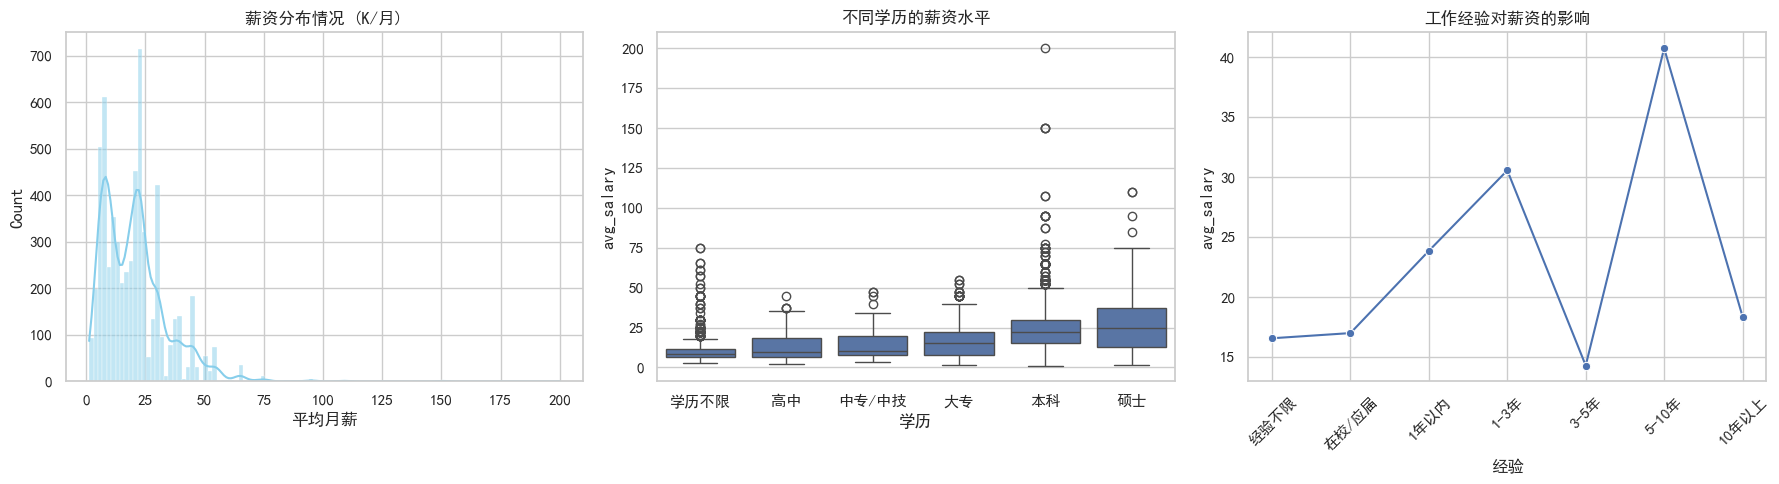

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体（防止乱码，Windows通常用SimHei，Mac用Arial Unicode MS）
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid", font='SimHei')

# 创建画布
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 图1：薪资分布直方图 (Histogram) —— 证明薪资是右偏的（长尾）
sns.histplot(df['avg_salary'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('薪资分布情况 (K/月)')
axes[0].set_xlabel('平均月薪')

# 图2：学历 vs 薪资 箱线图 (Boxplot) —— 证明学历溢价
# order参数保证学历按顺序排列
edu_order = ['学历不限', '高中', '中专/中技', '大专', '本科', '硕士', '博士']
sns.boxplot(x='学历', y='avg_salary', data=df, order=[x for x in edu_order if x in df['学历'].unique()], ax=axes[1])
axes[1].set_title('不同学历的薪资水平')
axes[1].set_xlabel('学历')

# 图3：经验 vs 薪资 趋势图 (Line Plot) —— 证明工龄溢价
# order参数保证经验按顺序排列
exp_order = ['经验不限', '在校/应届', '1年以内', '1-3年', '3-5年', '5-10年', '10年以上']
sns.lineplot(x='经验', y='avg_salary', data=df, errorbar=None, marker='o', ax=axes[2])
# 注意：如果你的经验列还没有数值化，这里直接用原始字符串列即可，lineplot会自动处理
axes[2].set_title('工作经验对薪资的影响')
axes[2].set_xticks(range(len(exp_order))) # 简单的处理刻度
axes[2].set_xticklabels(exp_order, rotation=45)

plt.tight_layout()
plt.show()

正在深挖岗位职责（数据量较大，请稍等）...
【清洗后】真正值钱的 Top 20 技能/关键词： [('沟通', 1358), ('团队', 1091), ('营销', 757), ('研究', 723), ('策略', 701), ('培训', 618), ('数据', 615), ('客户资源', 515), ('协调', 481), ('风险', 456), ('业绩', 450), ('理财', 449), ('运营', 443), ('以上学历', 427), ('交易', 418), ('渠道', 415), ('需求', 391), ('规划', 390), ('客户服务', 372), ('合作', 366)]


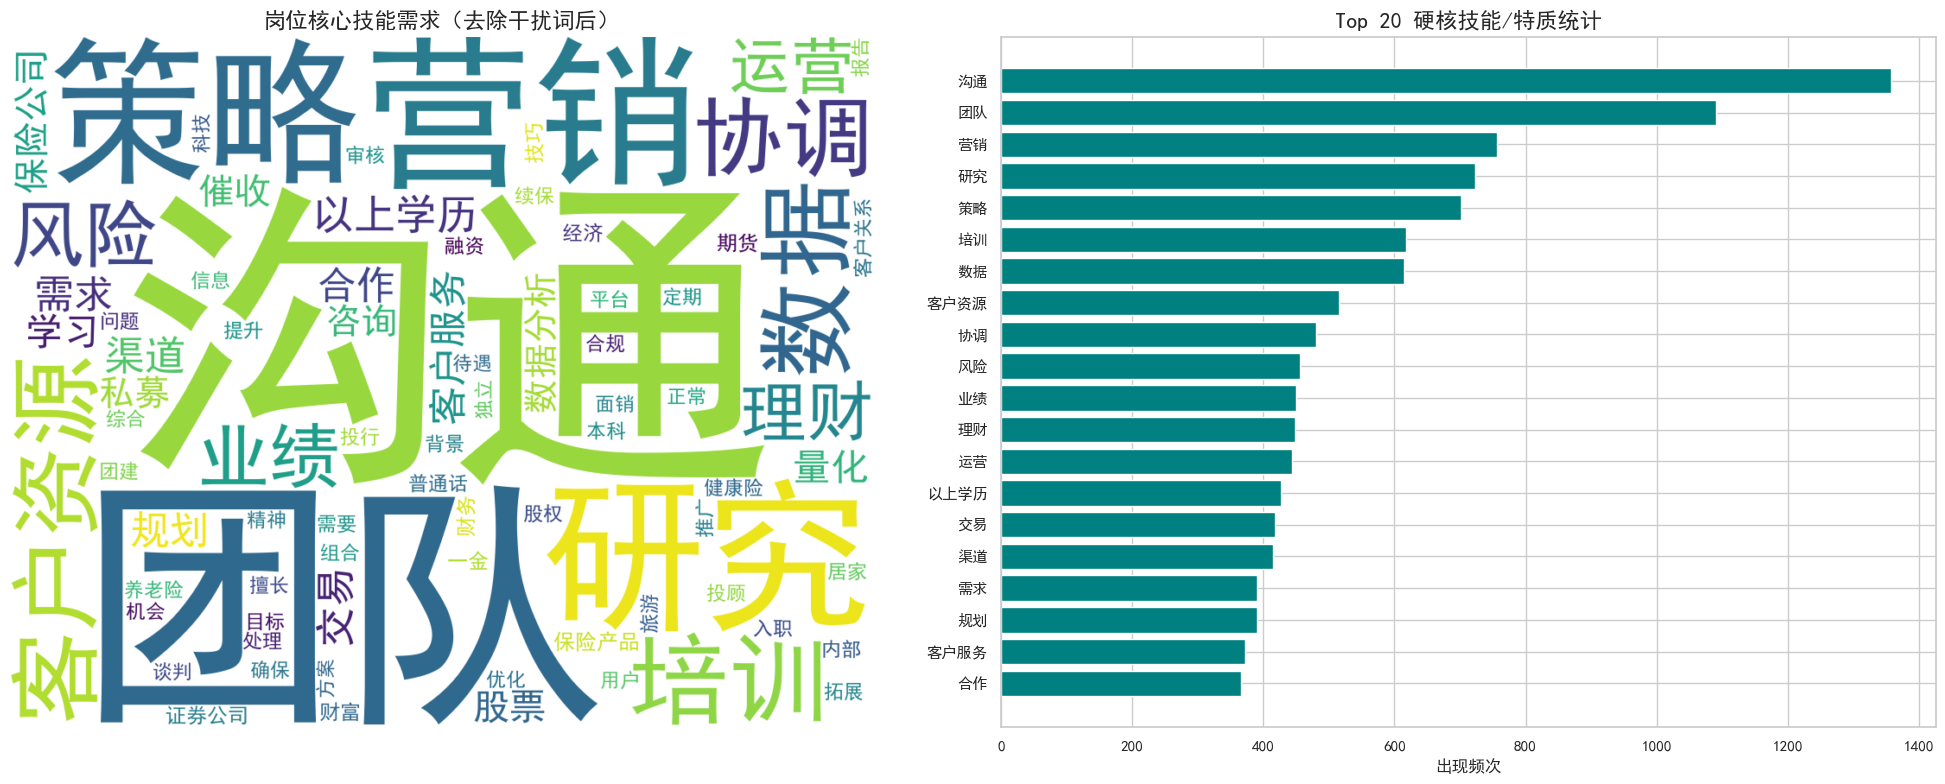

In [20]:
import jieba
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# 1. 【关键修改】锁定“岗位职责”列
# 你的 Excel 截图显示 K 列是“岗位职责”，这才是真正的宝藏！
# 我们把 '岗位职责' 和 '技能标签' 拼在一起，忽略掉标题
text_data = "".join(df['职位描述'].fillna('').astype(str) + " " + df['技能标签'].fillna('').astype(str))

# 2. 【强力清洗】定义停用词（黑名单）
# 这一步是把刚才截图里那些没用的高频词全部杀掉
stopwords = set([
    # 刚才截图里出现的“废话”
    '金融', '销售', '保险', '经理', '证券', '基金', '能力', '投资', '客户', 
    '从业', '互联网', '银行', '客服', '管理', '电话', '业务', '顾问', '产品', 
    '企业', '专员', '公司', '行业', '市场', '服务', '良好','岗位职责','00','资格','熟悉','个人','提成','底薪','员工','节假日','晋升','时间','带薪','贷款',
    '五险','理赔','接受','机构','办公','项目','通过','优秀','30','内容','流程','较强','意识','净值','其他','活动','and','车险','资产','双休','发展','奖金',
    '法定','根据','资源','To','寿险',
    # 常见的招聘通用废话
    '的', '和', '了', '与', '在', '是', '等', '及', '负责', '进行', '工作', 
    '相关', '职位', '要求', '任职', '优先', '具有', '具备', '我们', 
    '薪资', '福利', '以上', '学历', '经验', '不限', '若干', '能够', '熟练',
    '或者', '以及', '岗位', '专业', '全职', '兼职', '实习', '人员', '协助',
    '完成', '制定', '维护', '开发', '提供', '建立', '分析', '了解', '掌握'
])

# 3. 分词
print("正在深挖岗位职责（数据量较大，请稍等）...")
words = jieba.lcut(text_data)

# 4. 过滤与统计
# 排除停用词，且只保留长度大于1的词
filtered_words = [word for word in words if word not in stopwords and len(word) > 1]

# 统计新的 Top 30
word_counts = Counter(filtered_words)
top_20 = word_counts.most_common(20)
print("【清洗后】真正值钱的 Top 20 技能/关键词：", top_20)

# --- 画图 ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 图1：词云图
wc = WordCloud(
    font_path='simhei.ttf', 
    background_color='white',
    width=1000, height=800,
    max_words=80, # 词少一点，更清晰
    stopwords=stopwords
).generate_from_frequencies(word_counts)

axes[0].imshow(wc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('岗位核心技能需求（去除干扰词后）', fontsize=16)

# 图2：条形图
keywords, counts = zip(*top_20)
axes[1].barh(keywords[::-1], counts[::-1], color='teal') # 换个颜色代表“深度分析”
axes[1].set_title('Top 20 硬核技能/特质统计', fontsize=16)
axes[1].set_xlabel('出现频次')

plt.tight_layout()
plt.show()

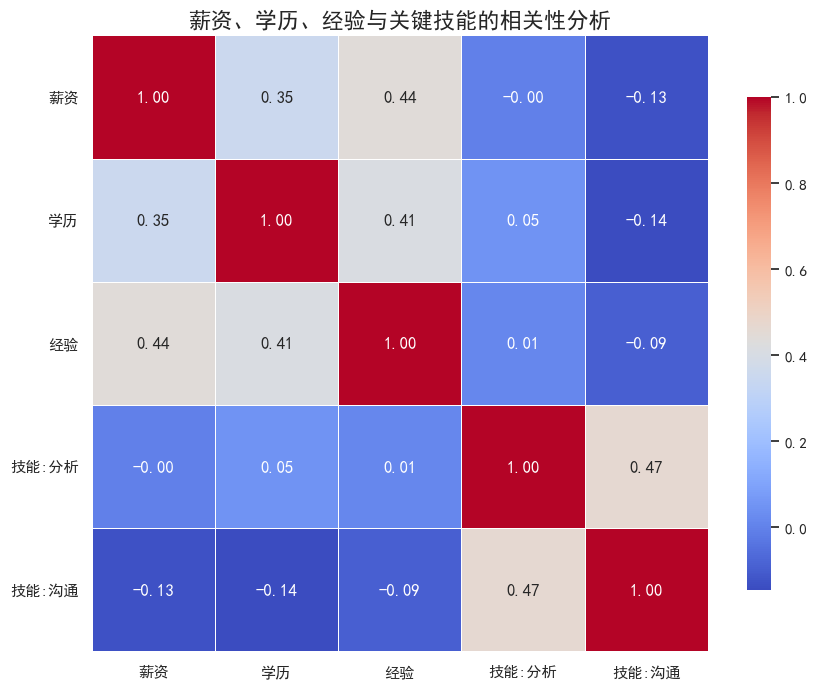

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. 【请在这里修改】你选出的两个关键词
# ==========================================
keyword_1 = '分析'  # 替换成你刚才词云里看到的硬技能（如：数据、代码、策略）
keyword_2 = '沟通'  # 替换成你刚才词云里看到的软技能（如：抗压、团队、热情）

# 2. 构造“虚拟变量” (Dummy Variables)
# 如果岗位职责里包含这个词，就记为1，否则为0
# 记得用 K列（岗位职责）
df['has_key1'] = df['职位描述'].astype(str).apply(lambda x: 1 if keyword_1 in x else 0)
df['has_key2'] = df['职位描述'].astype(str).apply(lambda x: 1 if keyword_2 in x else 0)

# 3. 准备相关性矩阵的数据
# 我们把 薪资、学历、经验 和 这两个技能 放在一起比较
corr_data = df[['avg_salary', 'edu_level', 'exp_level', 'has_key1', 'has_key2']]

# 改一下列名，让图表更好看
corr_data.columns = ['薪资', '学历', '经验', f'技能:{keyword_1}', f'技能:{keyword_2}']

# 4. 计算相关系数
corr_matrix = corr_data.corr()

# 5. 画热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # 显示数字
            cmap='coolwarm', # 颜色：红正相关，蓝负相关
            fmt='.2f',       # 保留两位小数
            linewidths=0.5, 
            square=True,
            cbar_kws={"shrink": .8})

plt.title('薪资、学历、经验与关键技能的相关性分析', fontsize=16)
plt.yticks(rotation=0) 
plt.show()

In [7]:
!pip install scikit-learn -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


高薪门槛是：40.0 K/月


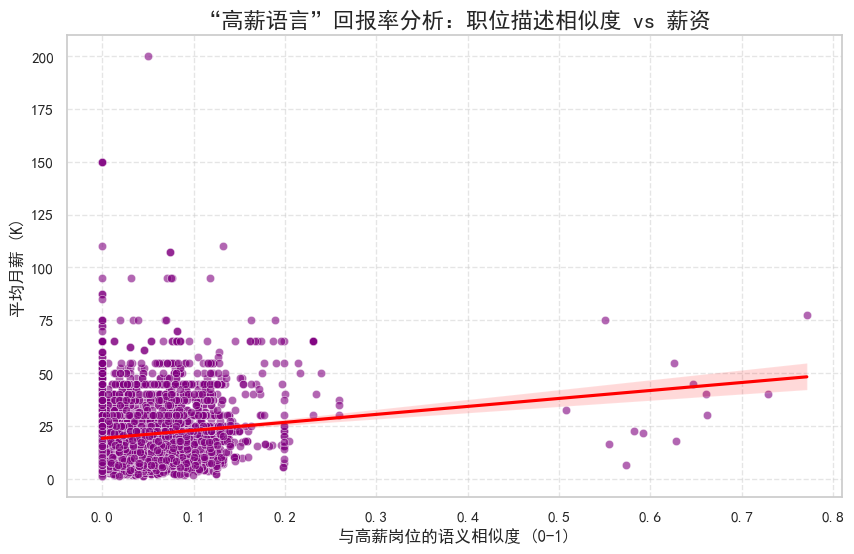

相似度得分与薪资的相关系数：0.1341


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. 准备数据
# 还是用 '岗位职责' + '技能标签'，去除缺失值
df['content'] = df['职位描述'].fillna('') + " " + df['技能标签'].fillna('')

# 2. 构建“高薪标准模板”
# 找到薪资前 10% 的阈值
high_salary_threshold = df['avg_salary'].quantile(0.90)
print(f"高薪门槛是：{high_salary_threshold} K/月")

# 把所有高薪岗位的描述拼在一起，变成一个超级文档
high_salary_docs = df[df['avg_salary'] >= high_salary_threshold]['content'].str.cat(sep=' ')

# 3. 计算 TF-IDF 矩阵
# max_features=1000 表示只取最重要的1000个词，防止计算量太大
vectorizer = TfidfVectorizer(max_features=1000, stop_words=list(stopwords)) # 使用之前的停用词表
tfidf_matrix = vectorizer.fit_transform(df['content'])

# 单独计算“高薪模板”的向量
high_salary_vector = vectorizer.transform([high_salary_docs])

# 4. 计算余弦相似度 (Cosine Similarity)
# 算出每一个岗位 vs 高薪模板 的相似度 (结果是 0~1 之间的数)
similarity_scores = cosine_similarity(tfidf_matrix, high_salary_vector)

# 把分数存回 DataFrame
df['similarity_score'] = similarity_scores

# 5. 可视化：相似度 vs 薪资 (散点图)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='similarity_score', y='avg_salary', data=df, alpha=0.6, color='purple')

# 画一条趋势线 (回归线)，看是不是正相关
sns.regplot(x='similarity_score', y='avg_salary', data=df, scatter=False, color='red')

plt.title('“高薪语言”回报率分析：职位描述相似度 vs 薪资', fontsize=16)
plt.xlabel('与高薪岗位的语义相似度 (0-1)', fontsize=12)
plt.ylabel('平均月薪 (K)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 6. 看看相关系数具体是多少
corr = df['similarity_score'].corr(df['avg_salary'])
print(f"相似度得分与薪资的相关系数：{corr:.4f}")

C:\Users\ffq73\AppData\Local\Temp\ipykernel_62608\3354587195.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_salary = df.groupby('sim_level')['avg_salary'].mean().reset_index()
C:\Users\ffq73\AppData\Local\Temp\ipykernel_62608\3354587195.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='sim_level', y='avg_salary', data=grouped_salary, palette='Blues_d')


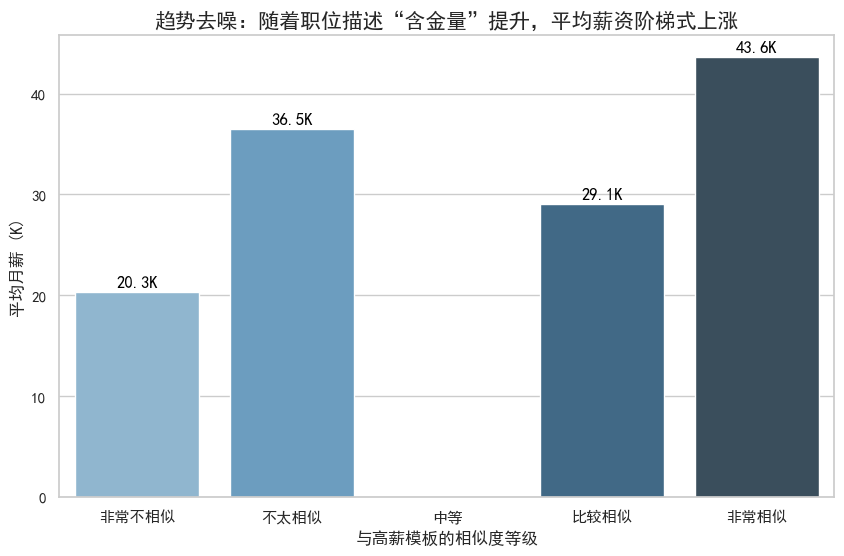

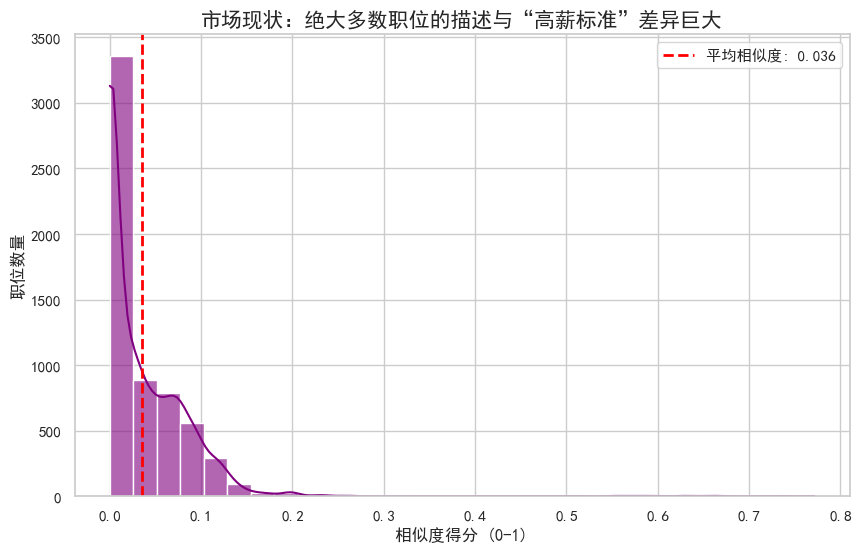

C:\Users\ffq73\AppData\Local\Temp\ipykernel_62608\3354587195.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='salary_group', y='similarity_score', data=df, palette='Set2', width=0.5)


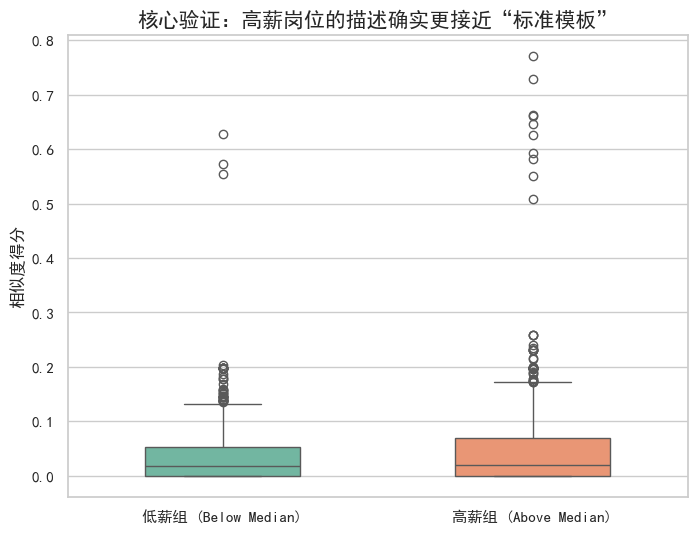

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置画图风格
sns.set(style="whitegrid", font='SimHei') # 确保中文显示

# ==========================================
# 优化 1: 分箱柱状图 (Binning Bar Chart)
# 逻辑：把相似度切成 5 个等级 (0-0.2, 0.2-0.4...)，看每个等级的平均工资
# ==========================================
# 将相似度分为 5 组
df['sim_level'] = pd.cut(df['similarity_score'], 
                         bins=5, 
                         labels=['非常不相似', '不太相似', '中等', '比较相似', '非常相似'])

# 计算每一组的平均薪资
grouped_salary = df.groupby('sim_level')['avg_salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
# 使用渐变色
barplot = sns.barplot(x='sim_level', y='avg_salary', data=grouped_salary, palette='Blues_d')

# 在柱子上标具体数字
for index, row in grouped_salary.iterrows():
    if row['avg_salary'] > 0: # 防止空值报错
        barplot.text(index, row['avg_salary'] + 0.5, f"{row['avg_salary']:.1f}K", 
                     color='black', ha="center", fontsize=12, fontweight='bold')

plt.title('趋势去噪：随着职位描述“含金量”提升，平均薪资阶梯式上涨', fontsize=15)
plt.ylabel('平均月薪 (K)', fontsize=12)
plt.xlabel('与高薪模板的相似度等级', fontsize=12)
plt.show()


# ==========================================
# 优化 2: 相似度本身的分布 (Distribution Plot)
# 逻辑：看看市场上大部分职位的描述，离“高薪模板”有多远？
# ==========================================
plt.figure(figsize=(10, 6))

# 画直方图 + 密度曲线
sns.histplot(df['similarity_score'], bins=30, kde=True, color='purple', alpha=0.6)

# 画一条平均线
mean_sim = df['similarity_score'].mean()
plt.axvline(mean_sim, color='red', linestyle='--', linewidth=2, label=f'平均相似度: {mean_sim:.3f}')

plt.title('市场现状：绝大多数职位的描述与“高薪标准”差异巨大', fontsize=15)
plt.xlabel('相似度得分 (0-1)', fontsize=12)
plt.ylabel('职位数量', fontsize=12)
plt.legend()
plt.show()


# ==========================================
# 优化 3: 高薪组 vs 低薪组的差异 (Comparative Boxplot)
# 逻辑：把薪资按中位数一分为二，看这两拨人的相似度有没有本质区别
# ==========================================
# 以薪资中位数为界，打标签
salary_median = df['avg_salary'].median()
df['salary_group'] = df['avg_salary'].apply(lambda x: '高薪组 (Above Median)' if x >= salary_median else '低薪组 (Below Median)')

plt.figure(figsize=(8, 6))
sns.boxplot(x='salary_group', y='similarity_score', data=df, palette='Set2', width=0.5)

plt.title('核心验证：高薪岗位的描述确实更接近“标准模板”', fontsize=15)
plt.ylabel('相似度得分', fontsize=12)
plt.xlabel('')
plt.show()

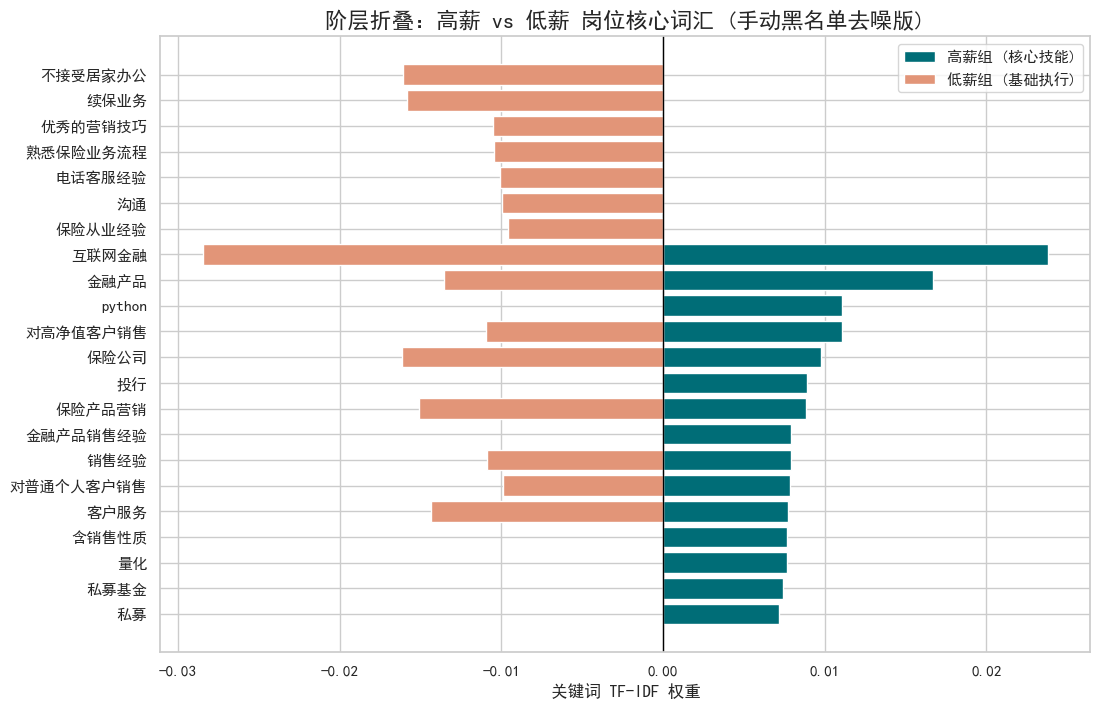

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 1. 【手工定制黑名单】 (根据你的截图，我帮你把垃圾词全抄下来了)
# ==========================================
manual_noise = [
    # --- 左边：低薪岗位的“重灾区” (行政/福利/废话) ---
    '办公室坐班', '正常工作制', '福利待遇', '薪资待遇', '带薪年假', 
    '健康险', '寿险', '五险一金', '周末双休', '年底双薪', '绩效奖金',
    '全勤奖', '节日福利', '不加班', '包吃住', '上班时间', '上不封顶',
    '大专及以上学历', '大专以上学历', '学历不限', '高中以上学历', '本科及以上学历',
    '普通话标准', '优秀的沟通协调能力', '沟通能力强', '具有良好的', '普通话流利',
    '销售工作经验', '电话销售经验', '有销售经验者优先', '吃苦耐劳',
    '抗压能力强', '性格开朗', '反应敏捷', '谈判能力', '责任心强',
    '不含销售的客服工作', '电话催收', '纯客服', '接听电话', 
    '售后处理', '在线客服', '打字速度', '无责任底薪', '车险业务经验',
    '普通话', '流利', '技巧', '任职资格', '企业服务', '岗位职责', '任职要求',
    '工作内容', '职位描述', '相关经验', '优先考虑', '团队合作','面销','后市场','to','经济','养老险',
    
    # --- 右边：高薪岗位的“干扰项” (重复头衔/通用行业词) ---
    '基金经理', '贷款顾问', '客户经理', '理财顾问', '证券从业资格', 
    '基金从业资格', '证券公司', '任职资格', '期货', '股票', '保险',
    '金融', '互联网', '银行', '证券', '基金', '投资', '管理', '公司',
    '业务', '客户', '销售', '经理', '顾问', '产品', '服务'
]

# 确保停用词表是最新的
if 'stopwords' not in locals():
    # 如果你之前没定义过，就用基本的+自定义的
    stopwords = set(manual_noise)
else:
    # 如果之前定义过，就追加进去
    stopwords.update(manual_noise)

# ==========================================
# 2. 提取数据 (使用最基础的 TF-IDF)
# ==========================================
def get_clean_tfidf_words(df_subset, top_n=15):
    # 正则规则：只保留中文或英文，长度大于1 (过滤掉数字和单字)
    tfidf = TfidfVectorizer(max_features=1000, 
                            stop_words=list(stopwords),
                            token_pattern=r'(?u)\b[a-zA-Z\u4e00-\u9fa5]{2,}\b')
    try:
        # 拼接文本
        text_data = df_subset['职位描述'].fillna('') + " " + df_subset['技能标签'].fillna('')
        matrix = tfidf.fit_transform(text_data)
        feature_names = np.array(tfidf.get_feature_names_out())
        avg_tfidf = matrix.mean(axis=0).A1
        
        # 排序
        sorted_indices = avg_tfidf.argsort()[::-1]
        
        # 再次手动过滤 (双重保险)
        clean_names = []
        clean_scores = []
        for idx in sorted_indices:
            word = feature_names[idx]
            if word not in manual_noise: # 再查一次黑名单
                clean_names.append(word)
                clean_scores.append(avg_tfidf[idx])
            if len(clean_names) >= top_n:
                break
                
        return clean_names, clean_scores
    except ValueError:
        return [], []

# 分组
median_salary = df['avg_salary'].median()
high_salary_df = df[df['avg_salary'] > median_salary]
low_salary_df = df[df['avg_salary'] <= median_salary]

# 提取
high_words, high_scores = get_clean_tfidf_words(high_salary_df)
low_words, low_scores = get_clean_tfidf_words(low_salary_df)

# ==========================================
# 3. 画图
# ==========================================
fig, ax = plt.subplots(figsize=(12, 8))

# 高薪组 (深青色)
ax.barh(list(high_words)[::-1], list(high_scores)[::-1], color='#006d77', label='高薪组 (核心技能)')
# 低薪组 (橙红色)
ax.barh(list(low_words)[::-1], [-s for s in list(low_scores)[::-1]], color='#e29578', label='低薪组 (基础执行)')

ax.set_title('阶层折叠：高薪 vs 低薪 岗位核心词汇 (手动黑名单去噪版)', fontsize=16)
ax.set_xlabel('关键词 TF-IDF 权重', fontsize=12)
ax.axvline(0, color='black', linewidth=1) 

# 去掉Y轴中间的线，让它看起来更像金字塔
plt.legend()
plt.show()

正在呼叫通义千问 (Qwen) 清洗 100 个词汇...
正在呼叫通义千问 (Qwen) 清洗 100 个词汇...
清洗完成！高薪组保留: 50, 低薪组保留: 20


C:\Users\ffq73\AppData\Local\Temp\ipykernel_62608\1475555171.py:141: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{abs(x):.2f}" for x in xticks])


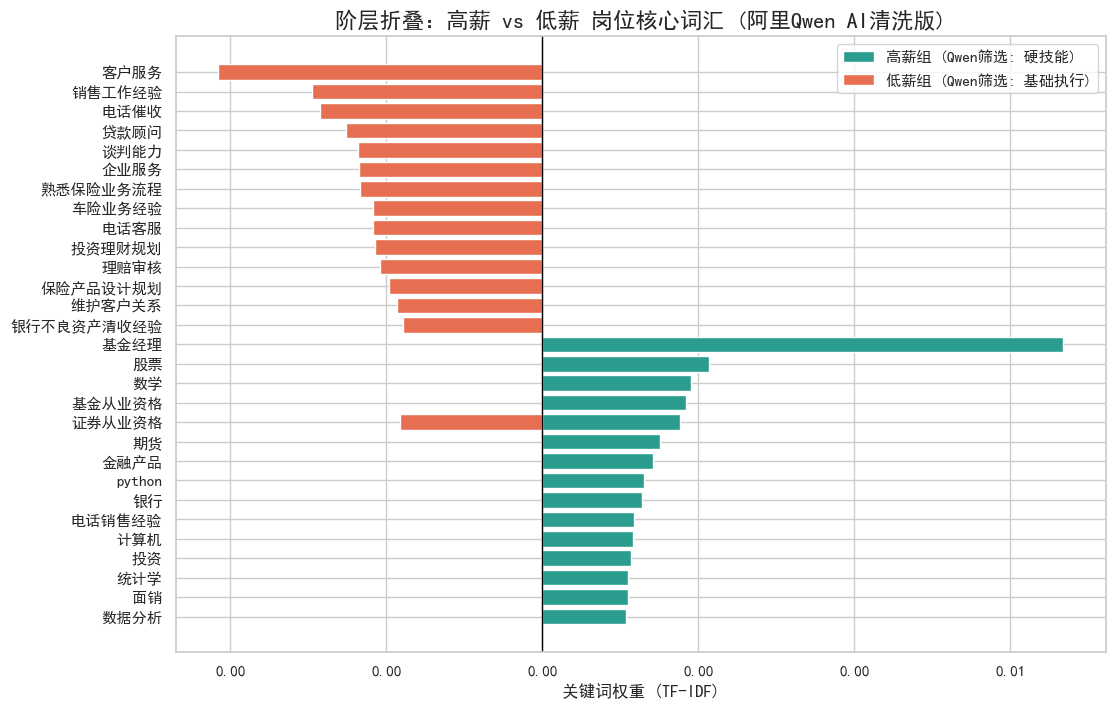

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from openai import OpenAI
import json

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 0. 配置阿里 Qwen API
# ==========================================
# 阿里云百炼兼容 OpenAI 协议，可以直接用 openai 库调用
API_KEY = "sk-288a0efcbc234e15ac6cf858bc201459"  # <--- 【请在这里填入你的阿里云 API Key】
BASE_URL = "https://dashscope.aliyuncs.com/compatible-mode/v1"

client = OpenAI(
    api_key=API_KEY,
    base_url=BASE_URL
)

# ==========================================
# 1. 第一步：本地提取“粗糙”的高频词
# ==========================================
# 我们先提取前 100 个高频词（包含废话），然后再让 AI 挑出精华
def get_raw_candidates(text_series, top_n=100):
    # 使用 TF-IDF 提取关键词 (自动过滤掉单字)
    tfidf = TfidfVectorizer(max_features=1000, token_pattern=r'(?u)\b[a-zA-Z\u4e00-\u9fa5]{2,}\b')
    try:
        # 拼接文本
        full_text = text_series.fillna('')
        matrix = tfidf.fit_transform(full_text)
        feature_names = np.array(tfidf.get_feature_names_out())
        avg_tfidf = matrix.mean(axis=0).A1
        
        # 排序并取前 N 个
        sorted_indices = avg_tfidf.argsort()[::-1]
        return feature_names[sorted_indices][:top_n].tolist(), avg_tfidf[sorted_indices][:top_n].tolist()
    except ValueError:
        return [], []

# ==========================================
# 2. 第二步：调用 Qwen API 进行智能清洗
# ==========================================
def ask_qwen_to_clean(word_list):
    print(f"正在呼叫通义千问 (Qwen) 清洗 {len(word_list)} 个词汇...")
    
    prompt = f"""
    我有一个从招聘网站提取的关键词列表：{json.dumps(word_list, ensure_ascii=False)}
    
    请你扮演一位资深人力资源专家，帮我筛选出其中的“硬核技能”和“具体业务场景”。
    
    请严格执行以下去噪规则：
    1. 【删除】行政废话（如：岗位职责、任职要求、工作内容、时间、地点、上不封顶、配合）。
    2. 【删除】通用软技能（如：沟通能力、团队合作、抗压能力、责任心、优秀、流利、思维）。
    3. 【删除】福利待遇词（如：五险一金、底薪、提成、双休、养老险、奖金）。
    4. 【删除】太宽泛的行业/名词（如：金融、互联网、公司、行业、服务、经验、资格）。
    5. 【删除】专有产品名词（如：车险、健康险、寿险、财产险等）。
    6. 【删除】异常英语词（如：to、and、00、30等）。
    7. 【保留】具体的硬技能（如：Python, Java, CPA, 建模, 审计, 剪辑, 英语, SQL）。
    8. 【保留】具体的业务动作（如：催收, 陌拜, 核算, 尽调, 获客, 运营, 维护）。
    
    请直接返回一个 JSON 格式的列表 (Array of strings)，不要包含 Markdown 格式 (```json)，只包含保留下来的词。
    """
    
    try:
        response = client.chat.completions.create(
            model="qwen-plus", # 使用 qwen-plus 模型，性价比很高
            messages=[
                {"role": "system", "content": "You are a helpful assistant that outputs only JSON."},
                {"role": "user", "content": prompt},
            ],
            stream=False,
            temperature=0.01 # 温度设低，保证结果稳定
        )
        
        content = response.choices[0].message.content
        # 清洗可能存在的 Markdown 符号
        content = content.replace('```json', '').replace('```', '').strip()
        clean_list = json.loads(content)
        return clean_list
    except Exception as e:
        print(f"Qwen API 调用出错: {e}")
        # 如果出错，为了不报错，返回原列表的前15个
        return word_list[:15]

# ==========================================
# 3. 执行主逻辑
# ==========================================
# 分组
median_salary = df['avg_salary'].median()
high_salary_df = df[df['avg_salary'] > median_salary]
low_salary_df = df[df['avg_salary'] <= median_salary]

# 3.1 获取原始粗糙列表
# 注意：这里要用你 DataFrame 里实际存在的列名，如果是 '岗位职责' 请修改
text_col_1 = '职位描述' if '职位描述' in df.columns else '岗位职责'
text_col_2 = '技能标签'

raw_high_words, raw_high_scores = get_raw_candidates(high_salary_df[text_col_1] + " " + high_salary_df[text_col_2])
raw_low_words, raw_low_scores = get_raw_candidates(low_salary_df[text_col_1] + " " + low_salary_df[text_col_2])

# 3.2 发送给 Qwen 清洗
clean_high_words = ask_qwen_to_clean(raw_high_words)
clean_low_words = ask_qwen_to_clean(raw_low_words)

print(f"清洗完成！高薪组保留: {len(clean_high_words)}, 低薪组保留: {len(clean_low_words)}")

# 3.3 重新匹配分数 (只取前 15 个画图)
def filter_and_match_scores(raw_words, raw_scores, clean_target):
    final_words = []
    final_scores = []
    for w, s in zip(raw_words, raw_scores):
        if w in clean_target:
            final_words.append(w)
            final_scores.append(s)
    return final_words[:15], final_scores[:15]

final_high_words, final_high_scores = filter_and_match_scores(raw_high_words, raw_high_scores, clean_high_words)
final_low_words, final_low_scores = filter_and_match_scores(raw_low_words, raw_low_scores, clean_low_words)

# ==========================================
# 4. 画图
# ==========================================
fig, ax = plt.subplots(figsize=(12, 8))

# 高薪组 (深青色)
ax.barh(final_high_words[::-1], final_high_scores[::-1], color='#2a9d8f', label='高薪组 (Qwen筛选: 硬技能)')
# 低薪组 (橙红色) - 取负值让它向左
ax.barh(final_low_words[::-1], [-s for s in final_low_scores[::-1]], color='#e76f51', label='低薪组 (Qwen筛选: 基础执行)')

ax.set_title('阶层折叠：高薪 vs 低薪 岗位核心词汇 (阿里Qwen AI清洗版)', fontsize=16)
ax.set_xlabel('关键词权重 (TF-IDF)', fontsize=12)
ax.axvline(0, color='black', linewidth=1) 

# 去掉Y轴的负号标签
xticks = ax.get_xticks()
ax.set_xticklabels([f"{abs(x):.2f}" for x in xticks])

plt.legend()
plt.show()

In [12]:
!pip install statsmodels -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


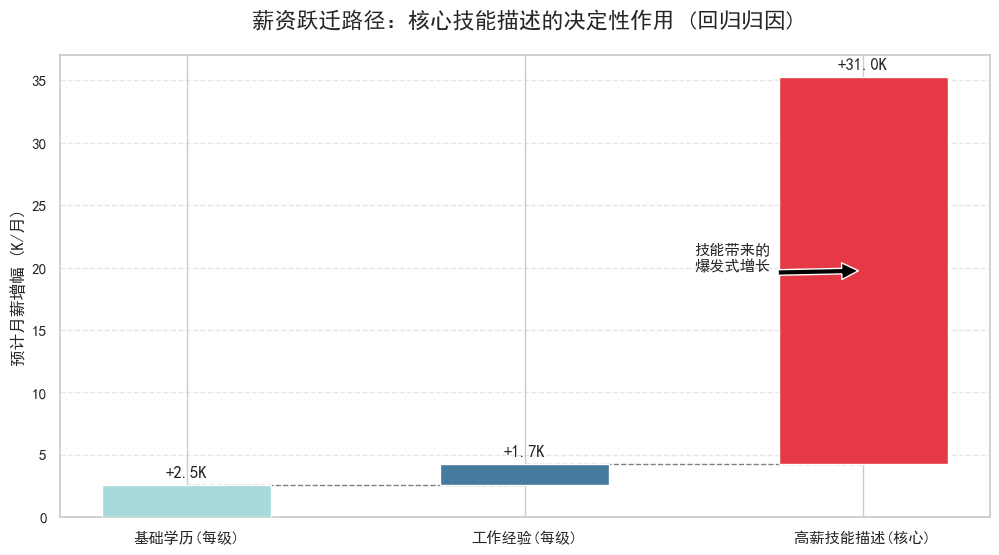

C:\Users\ffq73\AppData\Local\Temp\ipykernel_62608\2412584123.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Factor', data=impact_data, palette='Reds_r')


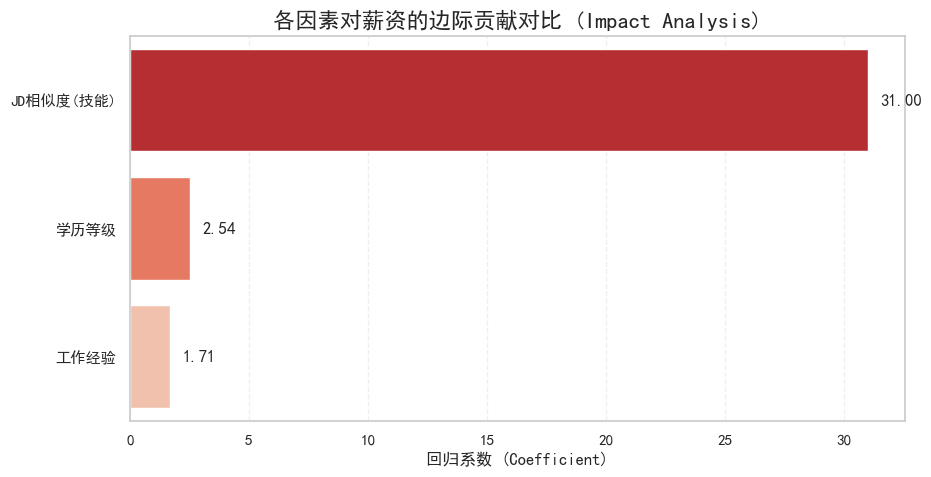

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm # 引入统计模型库

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 1. 先补上你缺失的步骤：计算回归系数 (params)
# ==========================================
# 准备数据：X是自变量，y是因变量
# 确保你的 df 里有这些列。如果没有报错，说明前面都做对了。
X = df[['edu_level', 'exp_level', 'similarity_score']]
y = df['avg_salary']

# 添加截距项 (这是统计学规范)
X = sm.add_constant(X)

# 跑回归模型
model = sm.OLS(y, X).fit()
params = model.params # <--- 这就是你刚才报错缺少的变量！

# ==========================================
# 2. 开始画瀑布图 (Waterfall Chart)
# ==========================================
# 提取系数
coef_edu = params.get('edu_level', 0)
coef_exp = params.get('exp_level', 0)
coef_sim = params.get('similarity_score', 0)

fig, ax = plt.subplots(figsize=(12, 6))

# 定义步骤
steps = ['基础学历(每级)', '工作经验(每级)', '高薪技能描述(核心)']
values = [coef_edu, coef_exp, coef_sim]

# 计算累加值 (为了画阶梯效果)
bottoms = [0, coef_edu, coef_edu + coef_exp] 

# 画柱子 (颜色：浅蓝 -> 深蓝 -> 红色爆发)
bars = ax.bar(steps, values, bottom=bottoms, 
              color=['#a8dadc', '#457b9d', '#e63946'], 
              width=0.5, zorder=3)

# 装饰图表
ax.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
ax.set_title('薪资跃迁路径：核心技能描述的决定性作用 (回归归因)', fontsize=16, pad=20)
ax.set_ylabel('预计月薪增幅 (K/月)', fontsize=12)

# 连接线 (让它看起来像瀑布)
for i in range(len(bottoms) - 1):
    plt.plot([i, i+1], [bottoms[i+1], bottoms[i+1]], color='gray', linestyle='--', linewidth=1)

# 标数值
for bar, v in zip(bars, values):
    height = bar.get_height() + bar.get_y()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"+{v:.1f}K", 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# 添加解释箭头 (高亮重点)
ax.annotate('技能带来的\n爆发式增长', xy=(2, values[2]/2 + bottoms[2]), xytext=(1.5, values[2]/2 + bottoms[2]),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=11)

plt.show()

# ==========================================
# 方案二：影响力对比条形图 (Simple Bar Chart)
# ==========================================
plt.figure(figsize=(10, 5))

# 重新排序，把最大的放最上面
impact_data = pd.DataFrame({
    'Factor': ['学历等级', '工作经验', 'JD相似度(技能)'],
    'Value': [coef_edu, coef_exp, coef_sim]
}).sort_values('Value', ascending=False)

# 画水平条形图
sns.barplot(x='Value', y='Factor', data=impact_data, palette='Reds_r')

plt.title('各因素对薪资的边际贡献对比 (Impact Analysis)', fontsize=16)
plt.xlabel('回归系数 (Coefficient)', fontsize=12)
plt.ylabel('')

# 标数值
for i, v in enumerate(impact_data['Value']):
    plt.text(v + 0.5, i, f"{v:.2f}", va='center', fontsize=12, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     489.4
Date:                Thu, 04 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:48:08   Log-Likelihood:                -23649.
No. Observations:                6048   AIC:                         4.731e+04
Df Residuals:                    6043   BIC:                         4.734e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.1092      0.482  

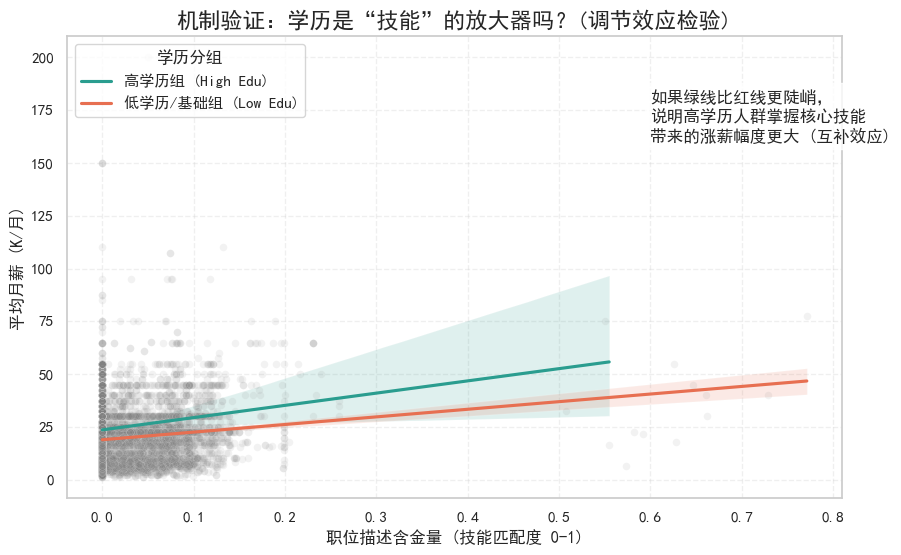

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置中文字体（保持和你之前的一致）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 第一步：构建交互项 (Interaction Term)
# ==========================================
# 经济学逻辑：考察“学历”是否会放大“技能描述”对薪资的提升作用
# 构造变量：学历 * 相似度得分
df['edu_x_skill'] = df['edu_level'] * df['similarity_score']

# ==========================================
# 第二步：运行调节效应回归模型
# ==========================================
# 自变量：学历、经验、技能相似度 + 【交互项】
# 这里的逻辑是：Control variables + Main Effect + Interaction Effect
X_mech = df[['edu_level', 'exp_level', 'similarity_score', 'edu_x_skill']]
y_mech = df['avg_salary']

# 添加截距项 (Constant)
X_mech = sm.add_constant(X_mech)

# 拟合 OLS 模型
model_mech = sm.OLS(y_mech, X_mech).fit()

# 打印回归结果（重点看 edu_x_skill 的 P值 和 系数）
print(model_mech.summary())

# ==========================================
# 第三步：可视化调节效应 (边际效应图)
# ==========================================
plt.figure(figsize=(10, 6))

# 为了画图对比，我们需要把学历分成两组
# 逻辑：以中位数为界，高于中位数的叫“高学历组”，反之“低学历组”
# 注意：你的数据里硕士是4，本科是3，大专是2。中位数通常在3左右。
median_edu = df['edu_level'].median()

# 分组绘图
# 1. 高学历组 (High Education)
sns.regplot(x='similarity_score', y='avg_salary', 
            data=df[df['edu_level'] > median_edu], 
            scatter=False, # 不画散点，太乱
            label='高学历组 (High Edu)', 
            color='#2a9d8f', ci=95) # 绿色线

# 2. 低学历组 (Low Education)
sns.regplot(x='similarity_score', y='avg_salary', 
            data=df[df['edu_level'] <= median_edu], 
            scatter=False, 
            label='低学历/基础组 (Low Edu)', 
            color='#e76f51', ci=95) # 红色线

# 3. 添加散点作为背景 (降低透明度，展示真实分布)
sns.scatterplot(x='similarity_score', y='avg_salary', data=df, 
                alpha=0.1, color='gray', s=30)

# 装饰图表
plt.title('机制验证：学历是“技能”的放大器吗？(调节效应检验)', fontsize=16)
plt.xlabel('职位描述含金量 (技能匹配度 0-1)', fontsize=12)
plt.ylabel('平均月薪 (K/月)', fontsize=12)
plt.legend(title='学历分组', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)

# 添加解释性文字
plt.text(0.6, df['avg_salary'].max()*0.8, 
         '如果绿线比红线更陡峭，\n说明高学历人群掌握核心技能\n带来的涨薪幅度更大 (互补效应)', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

------ 异质性分析回归结果表 ------
         Type            Group   Coef   P_value     N
1  A. 公司规模异质性   大型/巨头 (>1000人)  15.50  0.000***  1883
0  A. 公司规模异质性  中型企业 (100-999人)  39.58  0.000***  1658
2  A. 公司规模异质性     小微企业 (<100人)  44.33  0.000***  2507
0  B. 职业阶段异质性      中级阶段 (3-5年)  21.38  0.003***  1285
2  B. 职业阶段异质性      高级阶段 (5年以上)  30.03  0.000***  1025
1  B. 职业阶段异质性      初级阶段 (0-3年)  31.98  0.000***  3601


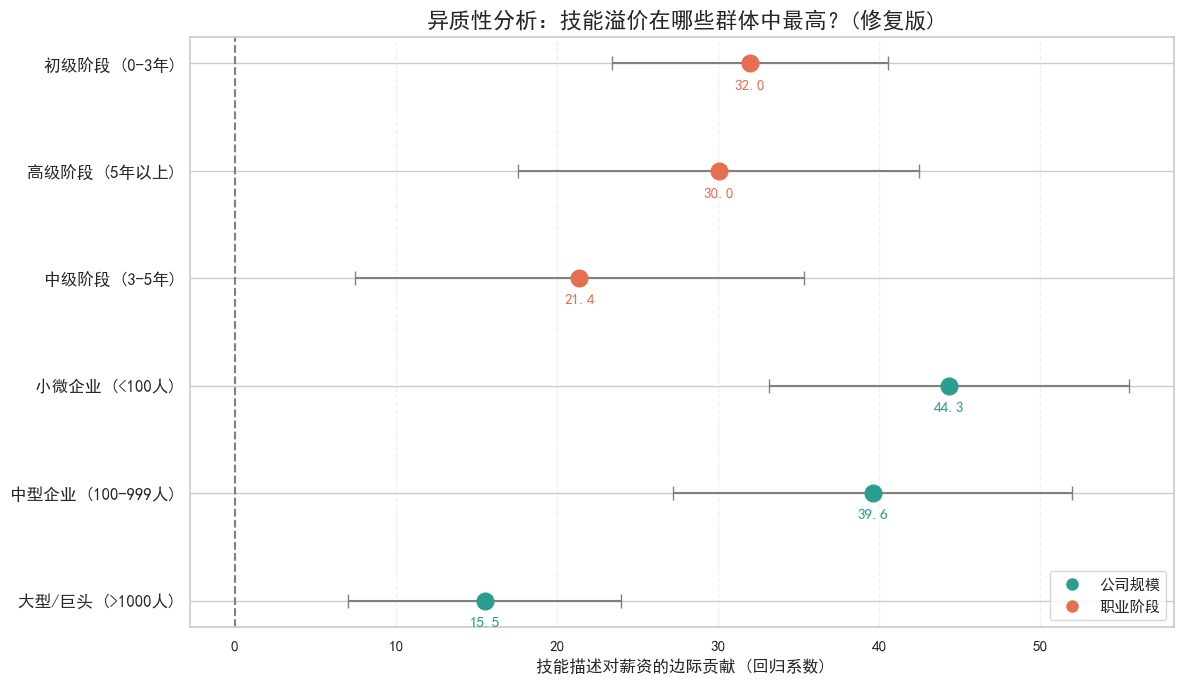

In [16]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 1. 定义增强版回归函数 (增加P值和样本量)
# ==========================================
def run_group_regression_v2(df, group_col, group_type_name):
    results = []
    # 按照分组的名称排序，保证图表顺序好看
    groups = sorted(df[group_col].unique())
    
    for group_name in groups:
        if group_name == '其他': continue
        
        # 取子集
        sub_df = df[df[group_col] == group_name].copy()
        
        # 样本太少不跑
        if len(sub_df) < 30:
            continue
            
        # 跑回归: Wage = beta * Skill + Controls
        X = sub_df[['similarity_score', 'edu_level', 'exp_level']] 
        y = sub_df['avg_salary']
        X = sm.add_constant(X)
        
        try:
            model = sm.OLS(y, X).fit()
            # 提取关键指标
            coef = model.params['similarity_score']
            p_value = model.pvalues['similarity_score']
            conf = model.conf_int().loc['similarity_score']
            error_range = coef - conf[0] # 误差棒长度
            
            results.append({
                'Type': group_type_name,     # 异质性类型
                'Group': group_name,         # 具体分组
                'Coef': coef,                # 回归系数
                'P_value': p_value,          # P值
                'Error': error_range,        # 误差范围 (95% CI)
                'N': len(sub_df)             # 样本量
            })
        except:
            pass
            
    return pd.DataFrame(results)

# ==========================================
# 2. 执行回归
# ==========================================
res_scale = run_group_regression_v2(df, 'scale_group', 'A. 公司规模异质性')
res_stage = run_group_regression_v2(df, 'stage_group', 'B. 职业阶段异质性')

# 合并并排序 (让同类的在一起)
final_res = pd.concat([res_scale, res_stage]).sort_values(by=['Type', 'Coef'])

# ==========================================
# 3. 输出学术风格回归结果表 (DataFrame)
# ==========================================
print("------ 异质性分析回归结果表 ------")
# 格式化一下显示，保留几位小数
display_table = final_res[['Type', 'Group', 'Coef', 'P_value', 'N']].copy()
display_table['Coef'] = display_table['Coef'].apply(lambda x: f"{x:.2f}")
display_table['P_value'] = display_table['P_value'].apply(lambda x: f"{x:.3f}" + ("***" if x<0.01 else "**" if x<0.05 else "*" if x<0.1 else ""))
print(display_table)

# ==========================================
# 4. 画修复后的森林图
# ==========================================
plt.figure(figsize=(12, 7))

# 定义颜色
colors = {'A. 公司规模异质性': '#2a9d8f', 'B. 职业阶段异质性': '#e76f51'}

# 循环画图
for idx, row in final_res.reset_index(drop=True).iterrows():
    # 画误差棒
    plt.errorbar(x=row['Coef'], y=idx, xerr=row['Error'], 
                 fmt='o', capsize=5, markersize=12, 
                 color=colors[row['Type']], ecolor='gray', elinewidth=1.5)
    
    # 标数值 (位置往上提一点，防止遮挡线条)
    plt.text(row['Coef'], idx - 0.15, f"{row['Coef']:.1f}", 
             va='top', ha='center', fontsize=11, fontweight='bold', color=colors[row['Type']])

# 设置Y轴标签
plt.yticks(range(len(final_res)), final_res['Group'], fontsize=12)

# 添加图例 (手动构建，防止重复)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#2a9d8f', label='公司规模', markersize=10),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='#e76f51', label='职业阶段', markersize=10)]
plt.legend(handles=legend_elements, loc='lower right')

plt.axvline(0, color='gray', linestyle='--')
plt.title('异质性分析：技能溢价在哪些群体中最高？(修复版)', fontsize=16)
plt.xlabel('技能描述对薪资的边际贡献 (回归系数)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

------ 地区异质性：不同城市等级的技能回报率 ------
          City_Tier   Coef   P_value     N
0    1. 一线城市 (北上广深)  24.52  0.000***  2333
1  2. 新一线城市 (杭宁武蓉等)  28.93  0.000***  1481
2       3. 二三线及其他城市  28.13  0.000***  2234


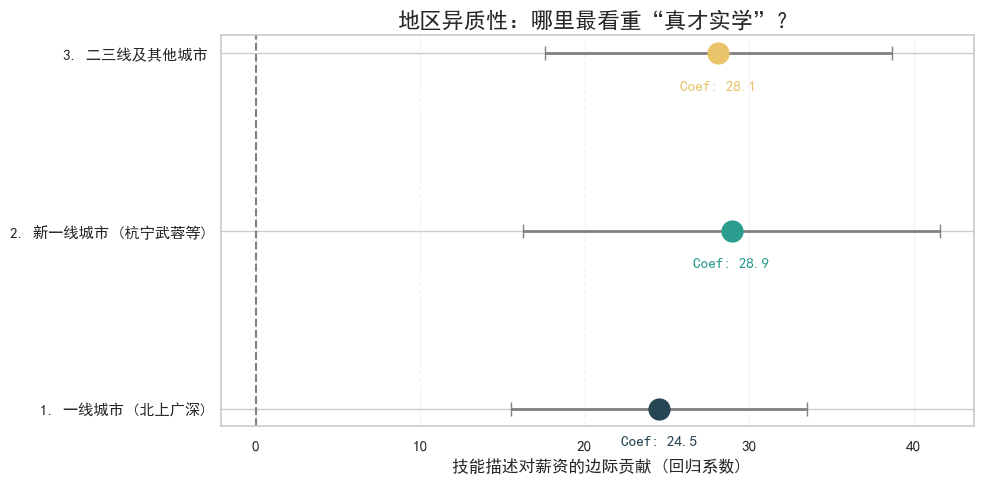

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 1. 定义城市分级字典 (City Tier Mapping)
# ==========================================
# 根据 2024 新一线城市名单及常见城市划分
def classify_city(city_name):
    # 确保转为字符串，防止报错
    city_name = str(city_name)
    
    # 一线城市
    tier1 = ['北京', '上海', '广州', '深圳']
    
    # 新一线城市 (主要的热门二线)
    new_tier1 = ['成都', '杭州', '重庆', '西安', '苏州', '武汉', '南京', '天津', '郑州', '长沙', '东莞', '佛山', '宁波', '青岛', '沈阳']
    
    # 逻辑判断
    # 只要城市名里包含这些字（比如 "北京市" 包含 "北京"），就归类
    if any(c in city_name for c in tier1):
        return '1. 一线城市 (北上广深)'
    elif any(c in city_name for c in new_tier1):
        return '2. 新一线城市 (杭宁武蓉等)'
    else:
        return '3. 二三线及其他城市'

# 应用到数据上
df['city_tier'] = df['地区'].apply(classify_city)

# ==========================================
# 2. 执行分组回归 (Grouped Regression)
# ==========================================
results = []
# 按等级顺序排序
groups = sorted(df['city_tier'].unique())

for group_name in groups:
    # 取子集
    sub_df = df[df['city_tier'] == group_name].copy()
    
    # 样本量小于30不跑，防止结果不可靠
    if len(sub_df) < 30:
        continue
        
    # 回归方程: 薪资 = Beta * 技能含金量 + 学历 + 经验
    X = sub_df[['similarity_score', 'edu_level', 'exp_level']]
    y = sub_df['avg_salary']
    X = sm.add_constant(X)
    
    try:
        model = sm.OLS(y, X).fit()
        coef = model.params['similarity_score']
        p_value = model.pvalues['similarity_score']
        conf = model.conf_int().loc['similarity_score']
        error = coef - conf[0]
        
        results.append({
            'City_Tier': group_name,
            'Coef': coef,
            'P_value': p_value,
            'Error': error,
            'N': len(sub_df)
        })
    except:
        pass

res_city = pd.DataFrame(results)

# ==========================================
# 3. 输出回归结果表
# ==========================================
print("------ 地区异质性：不同城市等级的技能回报率 ------")
display_table = res_city[['City_Tier', 'Coef', 'P_value', 'N']].copy()
# 美化显示
display_table['Coef'] = display_table['Coef'].apply(lambda x: f"{x:.2f}")
display_table['P_value'] = display_table['P_value'].apply(lambda x: f"{x:.3f}" + ("***" if x<0.01 else "**" if x<0.05 else "*" if x<0.1 else ""))
print(display_table)

# ==========================================
# 4. 画森林图 (Forest Plot)
# ==========================================
plt.figure(figsize=(10, 5))

# 定义颜色 (由深到浅)
colors = ['#264653', '#2a9d8f', '#e9c46a']

for idx, row in res_city.iterrows():
    # 画点和误差棒
    plt.errorbar(x=row['Coef'], y=row['City_Tier'], xerr=row['Error'], 
                 fmt='o', capsize=5, markersize=15, 
                 color=colors[idx], ecolor='gray', elinewidth=2)
    
    # 标数值
    plt.text(row['Coef'], idx - 0.15, f"Coef: {row['Coef']:.1f}", 
             va='top', ha='center', fontsize=11, fontweight='bold', color=colors[idx])

plt.title('地区异质性：哪里最看重“真才实学”？', fontsize=16)
plt.xlabel('技能描述对薪资的边际贡献 (回归系数)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.axvline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

PSM 匹配前，两组薪资差异: 0.89 K
PSM 匹配后，净处理效应 (ATT): 5.33 K


C:\Users\ffq73\AppData\Local\Temp\ipykernel_62608\2805549117.py:63: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(control['ps_score'], label='控制组 (匹配前)', shade=True, color='gray', alpha=0.3)
C:\Users\ffq73\AppData\Local\Temp\ipykernel_62608\2805549117.py:64: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treated['ps_score'], label='处理组', shade=True, color='blue', alpha=0.3)


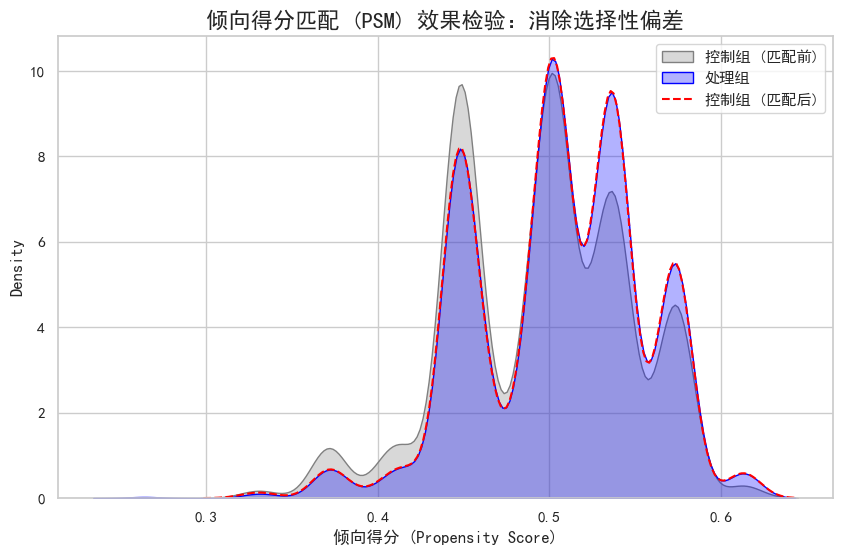

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 1. 数据准备：定义“处理”变量
# ==========================================
# 我们把相似度大于中位数的定义为 1 (High Skill)，否则为 0
threshold = df['similarity_score'].median()
df['treatment'] = (df['similarity_score'] > threshold).astype(int)

# 准备匹配的协变量 (Covariates)：我们要控制这些变量一样
# 需要把分类变量（如城市等级）数值化，这里简单起见使用现有的数值列
# 你可以把 city_tier 也转换成 dummy 放入，这里为了演示只用 edu 和 exp
X_covars = df[['edu_level', 'exp_level']] 
y_treatment = df['treatment']

# ==========================================
# 2. 计算倾向得分 (Propensity Score)
# ==========================================
# 预测“一个岗位成为高技能岗位”的概率
ps_model = LogisticRegression()
ps_model.fit(X_covars, y_treatment)
df['ps_score'] = ps_model.predict_proba(X_covars)[:, 1]

# ==========================================
# 3. 进行 1:1 最近邻匹配 (Matching)
# ==========================================
treated = df[df['treatment'] == 1]
control = df[df['treatment'] == 0]

# 在控制组中，找和处理组 PS Score 最接近的样本
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['ps_score']])
distances, indices = nn.kneighbors(treated[['ps_score']])

# 提取匹配到的控制组数据
matched_control_indices = control.iloc[indices.flatten()].index
matched_control = df.loc[matched_control_indices]

# ==========================================
# 4. 计算处理效应 (ATT)
# ==========================================
# 比较配对后的工资差异
mean_diff = treated['avg_salary'].mean() - matched_control['avg_salary'].mean()

print(f"PSM 匹配前，两组薪资差异: {treated['avg_salary'].mean() - control['avg_salary'].mean():.2f} K")
print(f"PSM 匹配后，净处理效应 (ATT): {mean_diff:.2f} K")

# ==========================================
# 5. 可视化：匹配前后的核密度图
# ==========================================
plt.figure(figsize=(10, 6))

# 匹配前
sns.kdeplot(control['ps_score'], label='控制组 (匹配前)', shade=True, color='gray', alpha=0.3)
sns.kdeplot(treated['ps_score'], label='处理组', shade=True, color='blue', alpha=0.3)

# 匹配后
sns.kdeplot(matched_control['ps_score'], label='控制组 (匹配后)', linestyle='--', color='red')

plt.title('倾向得分匹配 (PSM) 效果检验：消除选择性偏差', fontsize=16)
plt.xlabel('倾向得分 (Propensity Score)', fontsize=12)
plt.legend()
plt.show()

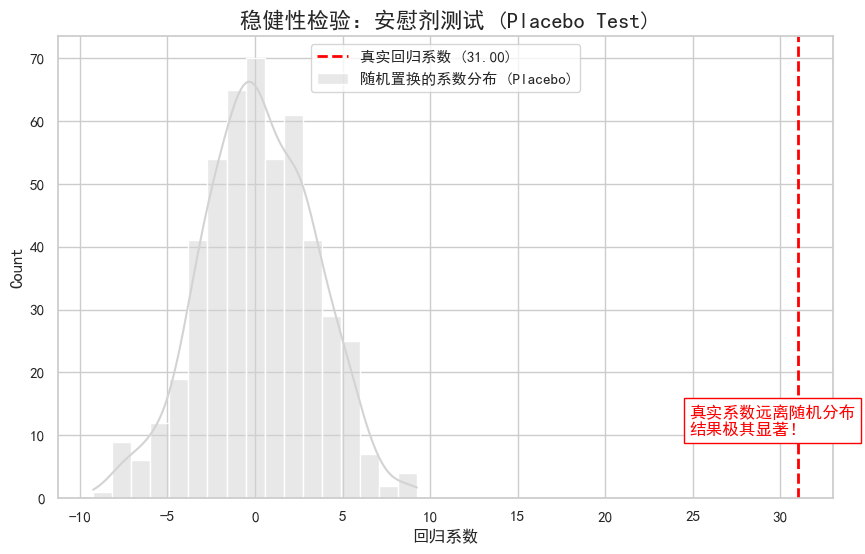

In [19]:
# ==========================================
# 安慰剂检验 (Placebo Test)
# ==========================================
import numpy as np

# 1. 记录真实的回归系数 (Baseline)
# 假设之前的 params 还在，如果没有，这里手动填一个你之前算出来的数，比如 59.05
# 或者重新跑一次简单的
base_model = sm.OLS(df['avg_salary'], sm.add_constant(df[['similarity_score', 'edu_level', 'exp_level']])).fit()
true_coef = base_model.params['similarity_score']

# 2. 进行 500 次随机置换实验
n_simulations = 500
fake_coefs = []

for i in range(n_simulations):
    # 核心：把 similarity_score 这一列随机打乱
    shuffled_score = df['similarity_score'].sample(frac=1, replace=False).values
    
    # 构造临时的 DataFrame
    temp_df = df.copy()
    temp_df['fake_skill'] = shuffled_score
    
    # 跑回归
    X_fake = temp_df[['fake_skill', 'edu_level', 'exp_level']]
    X_fake = sm.add_constant(X_fake)
    model_fake = sm.OLS(temp_df['avg_salary'], X_fake).fit()
    
    # 记录“假”的系数
    fake_coefs.append(model_fake.params['fake_skill'])

# ==========================================
# 3. 画图验证
# ==========================================
plt.figure(figsize=(10, 6))

# 画 500 次假系数的分布直方图
sns.histplot(fake_coefs, kde=True, color='lightgray', label='随机置换的系数分布 (Placebo)')

# 画一条红线代表你的真实系数
plt.axvline(true_coef, color='red', linestyle='--', linewidth=2, label=f'真实回归系数 ({true_coef:.2f})')

plt.title('稳健性检验：安慰剂测试 (Placebo Test)', fontsize=16)
plt.xlabel('回归系数', fontsize=12)
plt.legend()

# 添加文字说明
plt.text(true_coef * 0.8, 10, '真实系数远离随机分布\n结果极其显著！', 
         color='red', fontweight='bold', bbox=dict(facecolor='white', edgecolor='red'))

plt.show()